In [6]:
import pandas as pd
import numpy as np

In [7]:
# load data
df = pd.read_csv(r"D:\Coding\Energy-Management_Project\data\data_15min.csv")

# show data
df.head(10)

,utc_timestamp,cet_cest_timestamp,DE_KN_industrial1_grid_import,DE_KN_industrial1_pv_1,DE_KN_industrial1_pv_2,DE_KN_industrial2_grid_import,DE_KN_industrial2_pv,DE_KN_industrial2_storage_charge,DE_KN_industrial2_storage_decharge,DE_KN_industrial3_area_offices,...,DE_KN_residential5_refrigerator,DE_KN_residential5_washing_machine,DE_KN_residential6_circulation_pump,DE_KN_residential6_dishwasher,DE_KN_residential6_freezer,DE_KN_residential6_grid_export,DE_KN_residential6_grid_import,DE_KN_residential6_pv,DE_KN_residential6_washing_machine,Unnamed: 70
0,2014-12-11T17:45:00Z,2014-12-11T18:45:00+0100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2014-12-11T18:00:00Z,2014-12-11T19:00:00+0100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2014-12-11T18:15:00Z,2014-12-11T19:15:00+0100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2014-12-11T18:30:00Z,2014-12-11T19:30:00+0100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2014-12-11T18:45:00Z,2014-12-11T19:45:00+0100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2014-12-11T19:00:00Z,2014-12-11T20:00:00+0100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2014-12-11T19:15:00Z,2014-12-11T20:15:00+0100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2014-12-11T19:30:00Z,2014-12-11T20:30:00+0100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2014-12-11T19:45:00Z,2014-12-11T20:45:00+0100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2014-12-11T20:00:00Z,2014-12-11T21:00:00+0100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# convert utc timestamp to datetime format

df['utc_timestamp'] = pd.to_datetime(df['utc_timestamp'])  # Convert to datetime
df.set_index('utc_timestamp', inplace=True)  # Set as index

In [9]:
df.index.dtype

datetime64[ns, UTC]

In [10]:
# checking missing values

df.isna().sum()

cet_cest_timestamp                         0
DE_KN_industrial1_grid_import          88080
DE_KN_industrial1_pv_1                 84659
DE_KN_industrial1_pv_2                 84659
DE_KN_industrial2_grid_import         108697
                                       ...  
DE_KN_residential6_grid_export         87055
DE_KN_residential6_grid_import         67677
DE_KN_residential6_pv                  67677
DE_KN_residential6_washing_machine     94674
Unnamed: 70                            32219
Length: 70, dtype: int64

In [11]:
# interpolation or forward fill

df.interpolate(method='time', inplace=True)  # Time-based interpolation
df.fillna(method='ffill', inplace=True)  # Forward fill


C:\Users\rrous\AppData\Local\Temp\ipykernel_24340\2124247814.py:3: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df.interpolate(method='time', inplace=True)  # Time-based interpolation
C:\Users\rrous\AppData\Local\Temp\ipykernel_24340\2124247814.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill


In [14]:
# checking missing values

df.isna().sum()

cet_cest_timestamp                        0
DE_KN_industrial1_grid_import         33744
DE_KN_industrial1_pv_1                30322
DE_KN_industrial1_pv_2                30322
DE_KN_industrial2_grid_import         41985
                                      ...  
DE_KN_residential6_grid_export        49807
DE_KN_residential6_grid_import        30429
DE_KN_residential6_pv                 30429
DE_KN_residential6_washing_machine    30425
Unnamed: 70                             301
Length: 70, dtype: int64

## Column Operations

In [15]:
# replace "DE_KN_" from all column names

df.columns = df.columns.str.replace("DE_KN_", "", regex=True)


In [16]:
df.columns

Index(['cet_cest_timestamp', 'industrial1_grid_import', 'industrial1_pv_1',
       'industrial1_pv_2', 'industrial2_grid_import', 'industrial2_pv',
       'industrial2_storage_charge', 'industrial2_storage_decharge',
       'industrial3_area_offices', 'industrial3_area_room_1',
       'industrial3_area_room_2', 'industrial3_area_room_3',
       'industrial3_area_room_4', 'industrial3_compressor',
       'industrial3_cooling_aggregate', 'industrial3_cooling_pumps',
       'industrial3_dishwasher', 'industrial3_ev', 'industrial3_grid_import',
       'industrial3_machine_1', 'industrial3_machine_2',
       'industrial3_machine_3', 'industrial3_machine_4',
       'industrial3_machine_5', 'industrial3_pv_facade', 'industrial3_pv_roof',
       'industrial3_refrigerator', 'industrial3_ventilation',
       'public1_grid_import', 'public2_grid_import', 'residential1_dishwasher',
       'residential1_freezer', 'residential1_grid_import',
       'residential1_heat_pump', 'residential1_pv',
      

In [17]:
# Renaming categories, e.g: industrial4 --> i4

import re

# Function to rename categories
def rename_category(col_name):
    col_name = re.sub(r"industrial(\d+)", r"i\1", col_name)  # industrialX → iX
    col_name = re.sub(r"public(\d+)", r"p\1", col_name)  # publicX → pX
    col_name = re.sub(r"residential(\d+)", r"r\1", col_name)  # residentialX → rX
    return col_name

# Apply renaming function to all column names
df.columns = [rename_category(col) for col in df.columns]


In [18]:
df.columns

Index(['cet_cest_timestamp', 'i1_grid_import', 'i1_pv_1', 'i1_pv_2',
       'i2_grid_import', 'i2_pv', 'i2_storage_charge', 'i2_storage_decharge',
       'i3_area_offices', 'i3_area_room_1', 'i3_area_room_2', 'i3_area_room_3',
       'i3_area_room_4', 'i3_compressor', 'i3_cooling_aggregate',
       'i3_cooling_pumps', 'i3_dishwasher', 'i3_ev', 'i3_grid_import',
       'i3_machine_1', 'i3_machine_2', 'i3_machine_3', 'i3_machine_4',
       'i3_machine_5', 'i3_pv_facade', 'i3_pv_roof', 'i3_refrigerator',
       'i3_ventilation', 'p1_grid_import', 'p2_grid_import', 'r1_dishwasher',
       'r1_freezer', 'r1_grid_import', 'r1_heat_pump', 'r1_pv',
       'r1_washing_machine', 'r2_circulation_pump', 'r2_dishwasher',
       'r2_freezer', 'r2_grid_import', 'r2_washing_machine',
       'r3_circulation_pump', 'r3_dishwasher', 'r3_freezer', 'r3_grid_export',
       'r3_grid_import', 'r3_pv', 'r3_refrigerator', 'r3_washing_machine',
       'r4_dishwasher', 'r4_ev', 'r4_freezer', 'r4_grid_export',
  

In [19]:
# drop "unnamed" column

df.drop(columns=["Unnamed: 70"], inplace=True)


In [20]:
df.columns

Index(['cet_cest_timestamp', 'i1_grid_import', 'i1_pv_1', 'i1_pv_2',
       'i2_grid_import', 'i2_pv', 'i2_storage_charge', 'i2_storage_decharge',
       'i3_area_offices', 'i3_area_room_1', 'i3_area_room_2', 'i3_area_room_3',
       'i3_area_room_4', 'i3_compressor', 'i3_cooling_aggregate',
       'i3_cooling_pumps', 'i3_dishwasher', 'i3_ev', 'i3_grid_import',
       'i3_machine_1', 'i3_machine_2', 'i3_machine_3', 'i3_machine_4',
       'i3_machine_5', 'i3_pv_facade', 'i3_pv_roof', 'i3_refrigerator',
       'i3_ventilation', 'p1_grid_import', 'p2_grid_import', 'r1_dishwasher',
       'r1_freezer', 'r1_grid_import', 'r1_heat_pump', 'r1_pv',
       'r1_washing_machine', 'r2_circulation_pump', 'r2_dishwasher',
       'r2_freezer', 'r2_grid_import', 'r2_washing_machine',
       'r3_circulation_pump', 'r3_dishwasher', 'r3_freezer', 'r3_grid_export',
       'r3_grid_import', 'r3_pv', 'r3_refrigerator', 'r3_washing_machine',
       'r4_dishwasher', 'r4_ev', 'r4_freezer', 'r4_grid_export',
  

In [21]:
# fill NaN with 0

df.fillna(0, inplace=True)


## Data Description

In [22]:
# total values > 0 in each column

count = (df['p2_grid_import'] > 0).sum()
print(f"Number of rows where 'p2_grid_import' > 0: {count}")

count = (df['i2_grid_import'] > 0).sum()
print(f"Number of rows where 'i2_grid_import' > 0: {count}")


count = (df['i3_grid_import'] > 0).sum()
print(f"Number of rows where 'i3_grid_import' > 0: {count}")

count = (df['r1_grid_import'] > 0).sum()
print(f"Number of rows where 'r1_grid_import' > 0: {count}")

count = (df['r4_grid_import'] > 0).sum()
print(f"Number of rows where 'r4_grid_import' > 0: {count}")



Number of rows where 'p2_grid_import' > 0: 84610
Number of rows where 'i2_grid_import' > 0: 111825
Number of rows where 'i3_grid_import' > 0: 112852
Number of rows where 'r1_grid_import' > 0: 138363
Number of rows where 'r4_grid_import' > 0: 124727


In [23]:
# data description

print(df.describe())

       i1_grid_import        i1_pv_1        i1_pv_2  i2_grid_import  \
count   153810.000000  153810.000000  153810.000000   153810.000000   
mean    275239.390097    5918.760899    4553.427506     9588.183520   
std     216788.433987    4665.771826    3550.023449     7448.848147   
min          0.000000       0.000000       0.000000        0.000000   
25%      24754.437500     405.940000     273.845000        0.000000   
50%     289379.367000    5571.942000    4391.593000    13734.177000   
75%     511112.711000   11001.342000    8377.523000    16699.016000   
max     511112.711000   11001.342000    8377.523000    16699.016000   

               i2_pv  i2_storage_charge  i2_storage_decharge  i3_area_offices  \
count  153810.000000      153810.000000        153810.000000    153810.000000   
mean    14205.244460         893.461889           541.774304     10141.113316   
std      9615.878858         706.270115           427.143250      6621.013695   
min         0.000000           0.000

<Axes: title={'center': 'Time Series Trends'}, xlabel='utc_timestamp'>

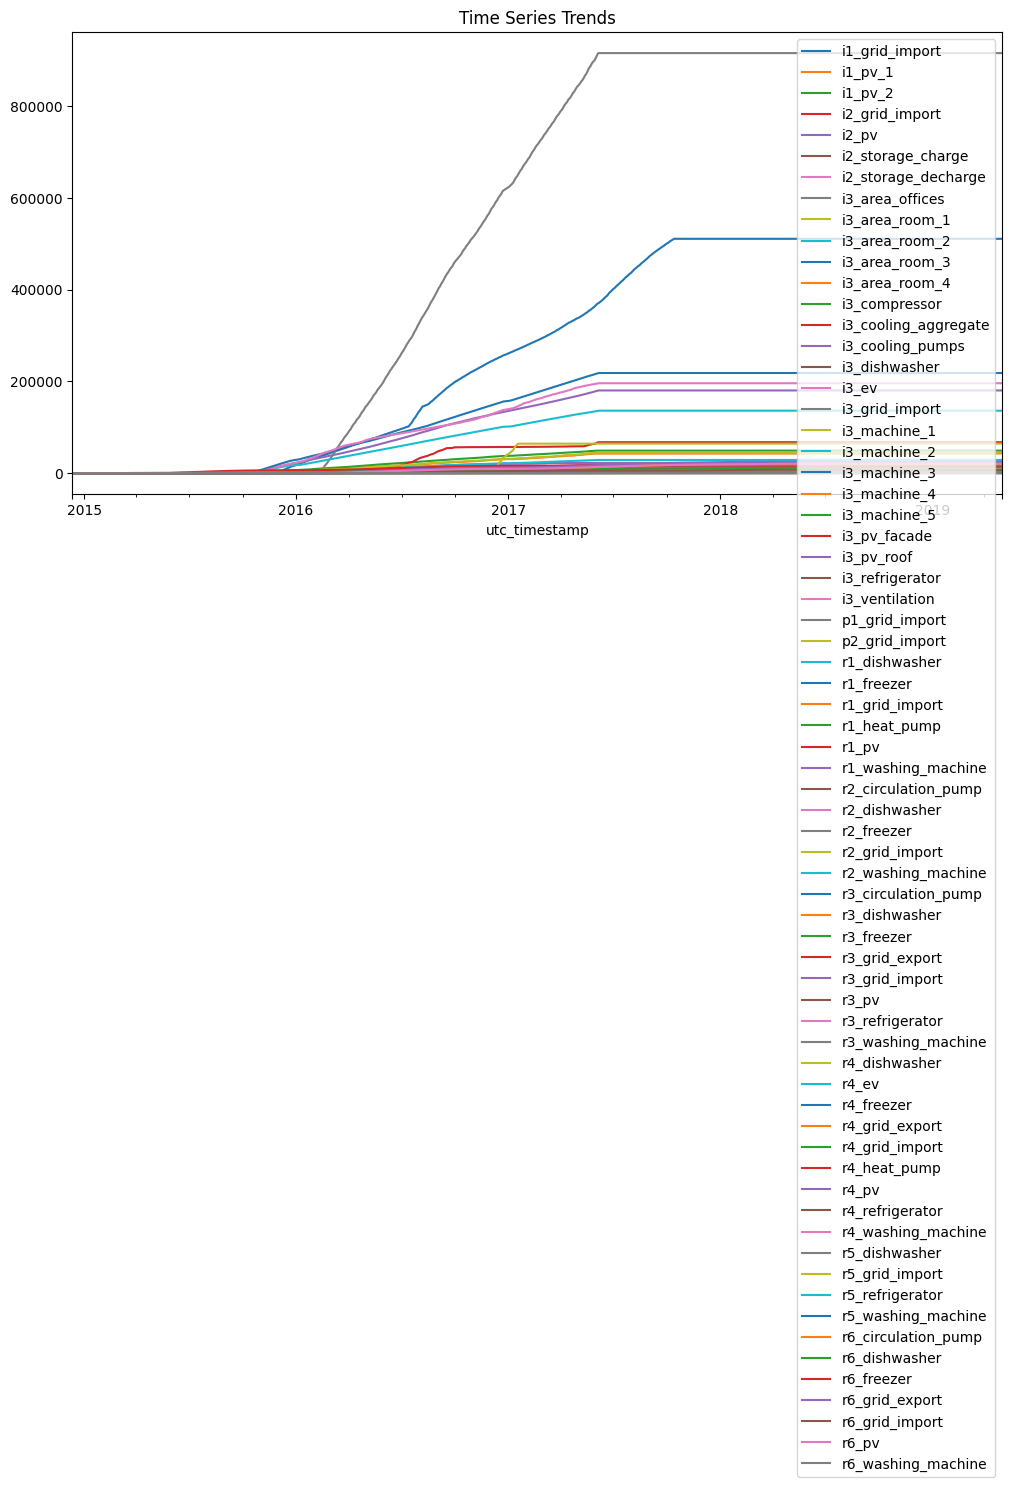

In [24]:
#time series trends

df.plot(figsize=(12, 6), title="Time Series Trends")


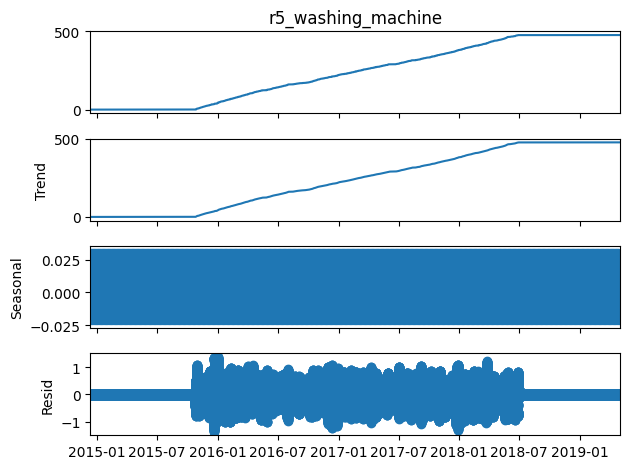

In [26]:
# Seasonal Decomposition Check
#Trend → Long-term increase/decrease in consumption.
#Seasonality → Repeating patterns (daily, weekly, yearly).
#Residuals → Random fluctuations.

from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df['r5_washing_machine'], model='additive', period=365)
result.plot()
plt.show()


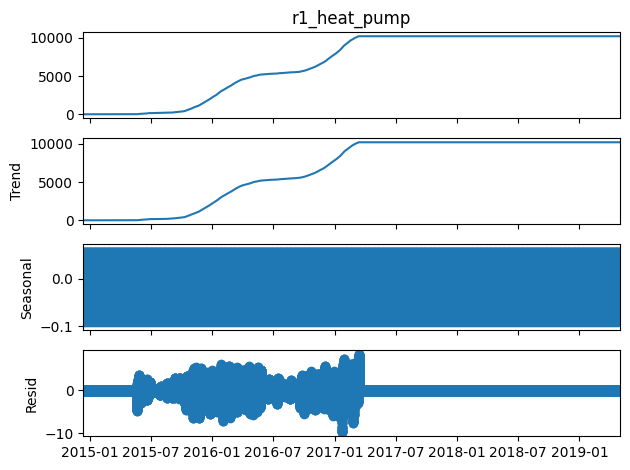

In [27]:
result = seasonal_decompose(df['r1_heat_pump'], model='additive', period=365)
result.plot()
plt.show()


## Model Building

In [31]:
from prophet import Prophet

d:\Coding\Energy_Management\em\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


In [58]:
# Prepare DataFrame for Prophet: reset index to get datetime as column 'ds'

df_prophet = df[['r6_washing_machine']].copy()  # take only target col
df_prophet['ds'] = df_prophet.index  # move index to column

In [59]:
# Remove timezone info from 'ds' column
df_prophet['ds'] = df_prophet['ds'].dt.tz_convert(None)

In [60]:
# Rename target column to 'y' as Prophet expects
df_prophet = df_prophet.rename(columns={'r6_washing_machine': 'y'})

In [61]:
# Filter training data: 1 month data from Jan 2016
train_1m = df_prophet[(df_prophet['ds'] >= '2016-01-01') & (df_prophet['ds'] < '2016-02-01')]


In [62]:
print(f"Training data shape: {train_1m.shape}")
print(train_1m.head())

Training data shape: (2976, 2)
                               y                  ds
utc_timestamp                                       
2016-01-01 00:00:00+00:00  8.777 2016-01-01 00:00:00
2016-01-01 00:15:00+00:00  8.777 2016-01-01 00:15:00
2016-01-01 00:30:00+00:00  8.777 2016-01-01 00:30:00
2016-01-01 00:45:00+00:00  8.777 2016-01-01 00:45:00
2016-01-01 01:00:00+00:00  8.777 2016-01-01 01:00:00


In [63]:
# Initialize Prophet model with daily and weekly seasonality (yearly off for short data)
model = Prophet(
    daily_seasonality=True,
    weekly_seasonality=True,
    yearly_seasonality=False
)


In [64]:
# Fit model
model.fit(train_1m)


18:26:44 - cmdstanpy - INFO - Chain [1] start processing
18:26:47 - cmdstanpy - INFO - Chain [1] done processing


In [65]:
# Create future dataframe for next 2 days (15-min freq, 96 intervals per day)
future = model.make_future_dataframe(periods=96*2, freq='15min')

In [66]:
# Predict future usage
forecast = model.predict(future)


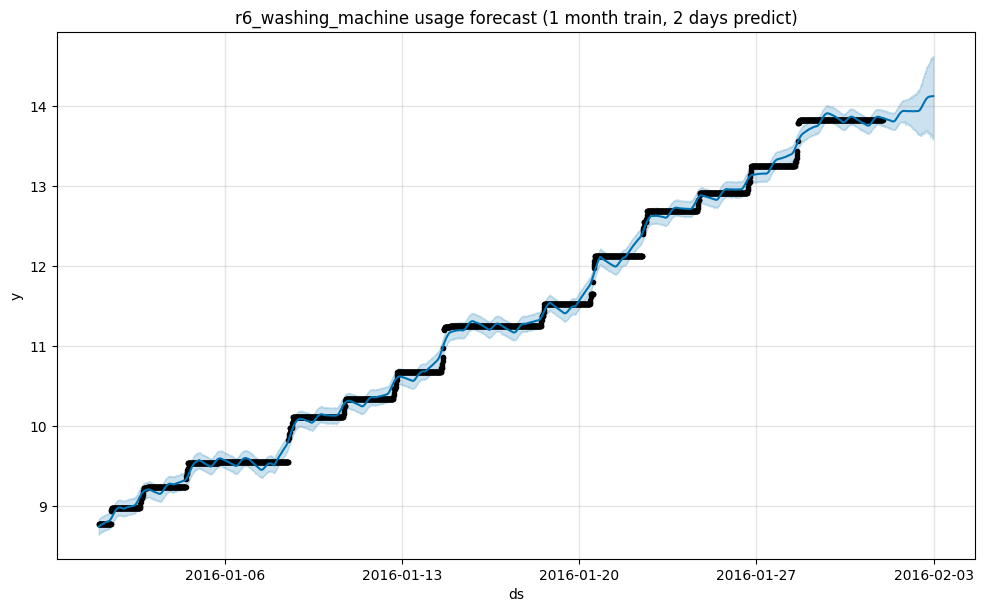

In [67]:
# Plot forecast
model.plot(forecast)
plt.title('r6_washing_machine usage forecast (1 month train, 2 days predict)')
plt.show()

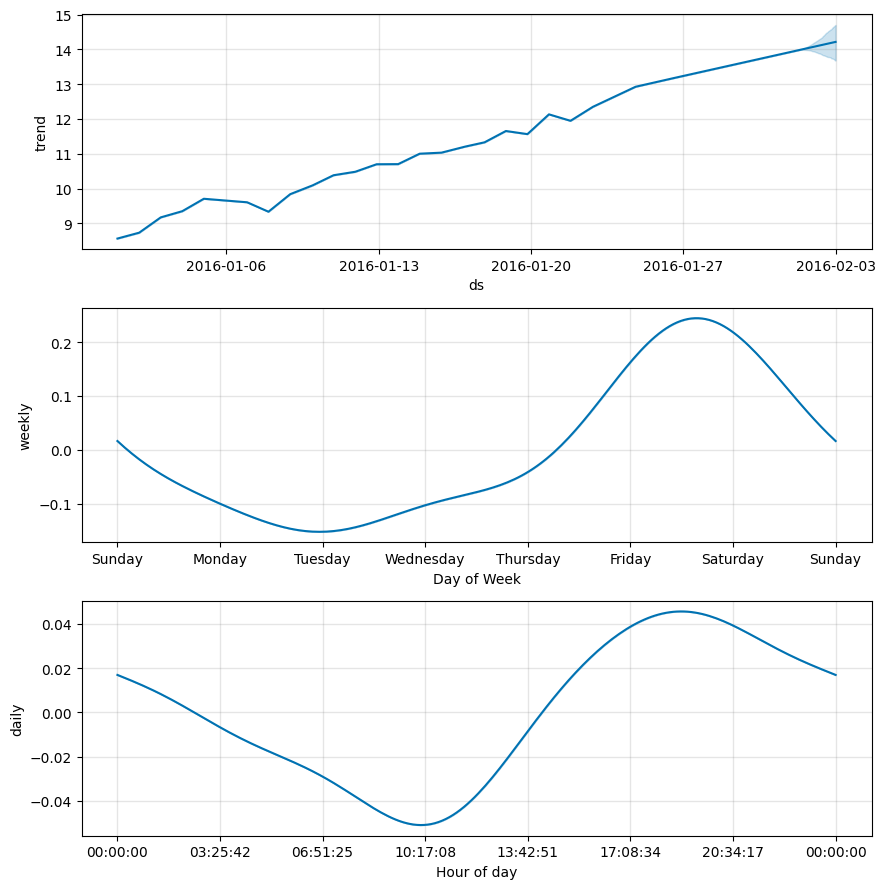

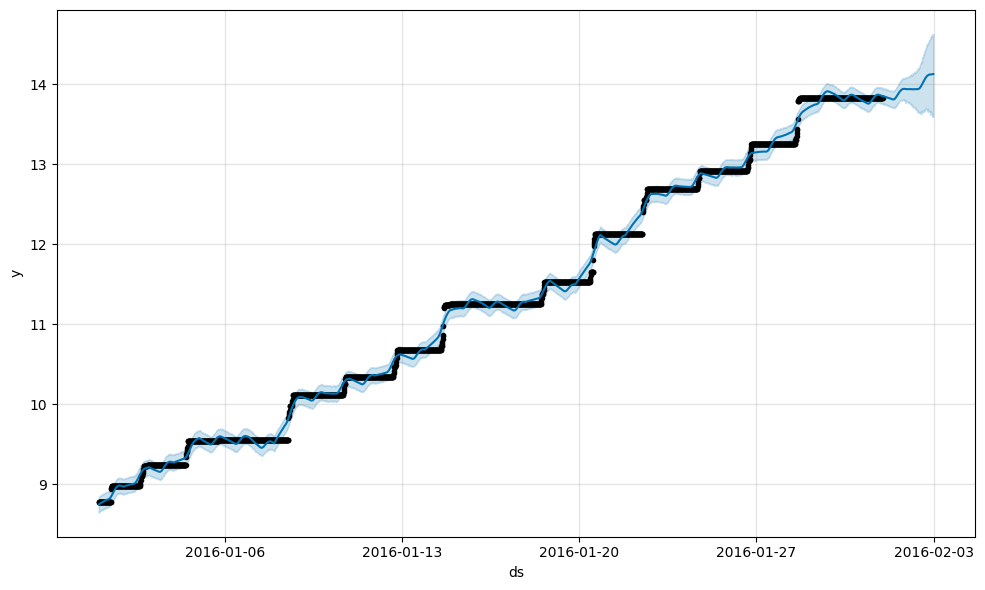

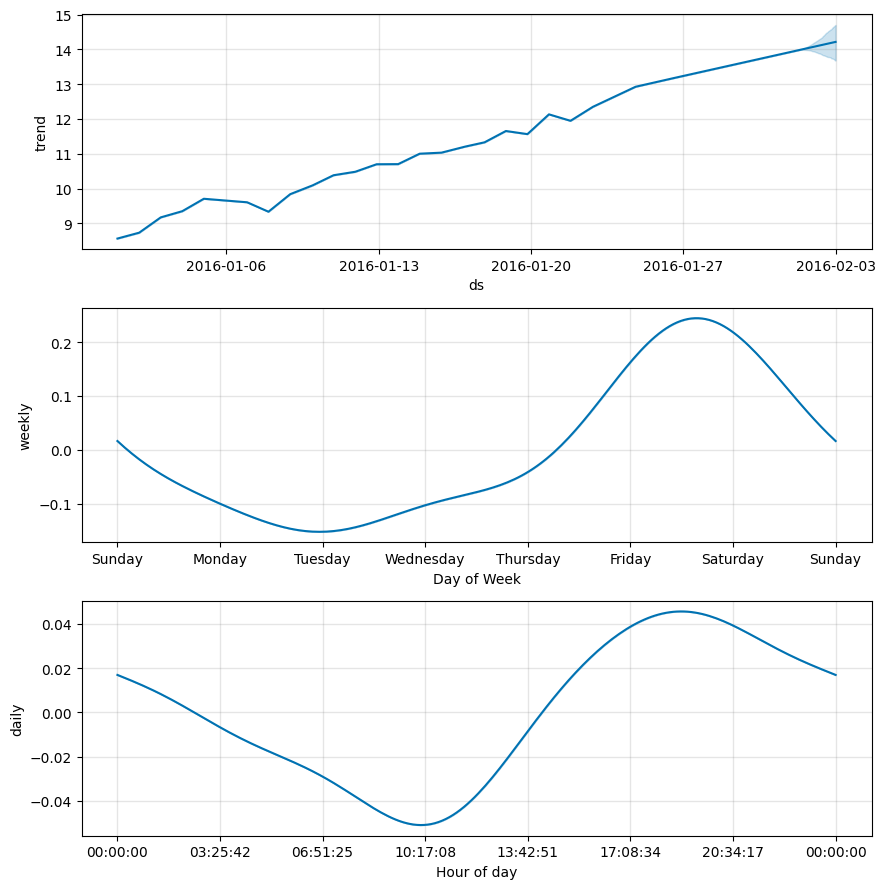

In [68]:
from prophet.plot import plot_plotly, plot_components_plotly

# Assuming you already have your trained model and forecast dataframe:

# Plot the main forecast plot (optional, if not already done)
model.plot(forecast)

# Plot the forecast components (trend, weekly and daily seasonality)
model.plot_components(forecast)
